In [32]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [33]:
model_input_shape = (224,224,3)

In [34]:
classes = {0: 'background',
 1: 'aeroplane',
 2: 'bicycle',
 3: 'bird',
 4: 'boat',
 5: 'bottle',
 6: 'bus',
 7: 'car',
 8: 'cat',
 9: 'chair',
 10: 'cow',
 11: 'diningtable',
 12: 'dog',
 13: 'horse',
 14: 'motorbike',
 15: 'person',
 16: 'pottedplant',
 17: 'sheep',
 18: 'sofa',
 19: 'train',
 20: 'tvmonitor'}

In [35]:
names=["softmax_part_cce", "cce_part", "max_part_sal", "softmax_part_scheduled"]
# names=["cce", ]
# name_compliment = "_full"
name_compliment = "_part"
img_numbers = list(range(743, 748))
epochs = [0,10,20,30] # , 19]
fixed_contributer = 2 # Number - 1 or None

In [36]:
def show_examples(names, compliments, img_numbers, epochs):
    for name in names:
        print(name)
        full_name = "model_" + name
        directory = "examples/" + full_name
        col = len(img_numbers)
        row = len(epochs) * 2
        fig = plt.figure(figsize=(14,14))
        for row_no, epoch in enumerate(epochs):
            row_no *= 2
            # row_no += 1
            for col_no, im_no in enumerate(img_numbers):
                # col_no += 1
                # col_no *= 2
                img = np.load(f"{directory}/{epoch}_augmented_{im_no}.npy")
                img -= np.min(img)
                img /= np.max(img)
                # print(np.min(img), np.max(img))
                spatial_scores = np.load(f"{directory}/{epoch}_spatial_scores_{im_no}.npy")[0,:,:,1:]
                # print(np.mean(spatial_scores, axis=(0,1)))
                largest_contributor = np.argmax(np.mean(spatial_scores, axis=(0,1)))
                largest_contributor = largest_contributor if fixed_contributer is None else fixed_contributer
                scores = spatial_scores[:,:,largest_contributor]

                plt.subplot(row, col, row_no * col + col_no + 1)
                plt.imshow(img)
                plt.axis("off")

                plt.subplot(row, col, (row_no + 1) * col + col_no + 1)
                # print(np.min(scores), np.max(scores))
                plt.imshow(scores, cmap="viridis", vmin=0.0, vmax=1.0)
                plt.title(classes[largest_contributor + 1])
                plt.axis("off")
        plt.savefig(f"{directory}/{name}_examples.jpg")
        plt.show()





softmax_part_cce


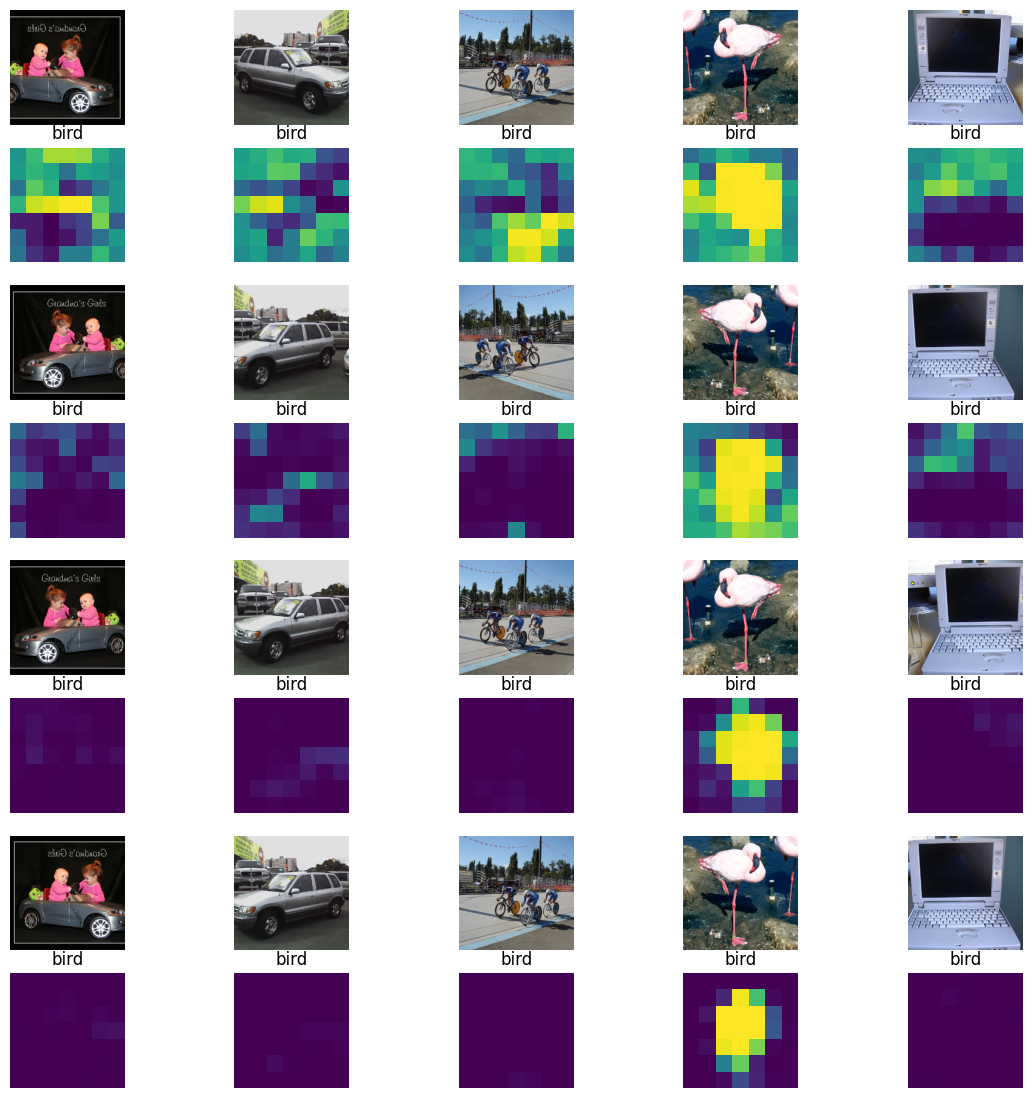

cce_part


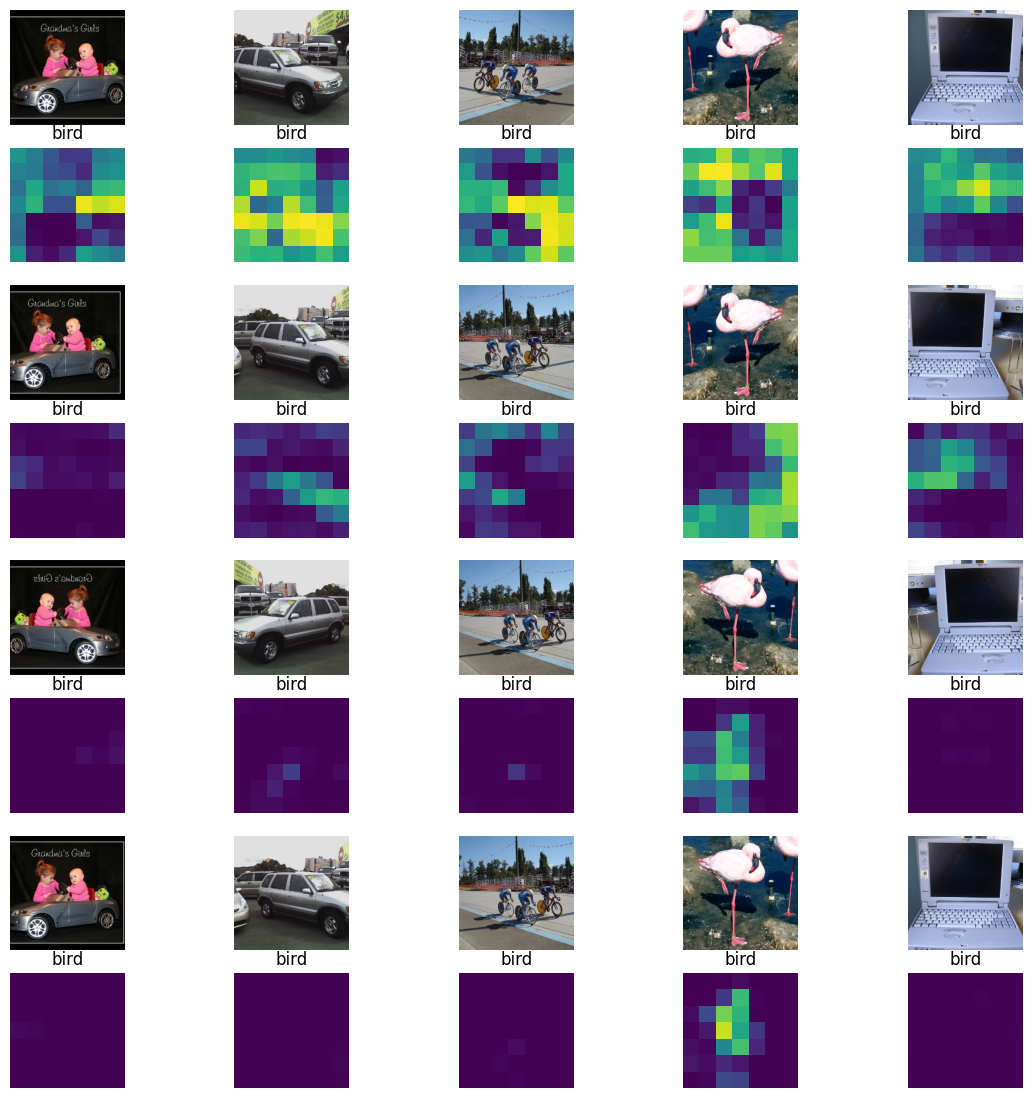

max_part_sal


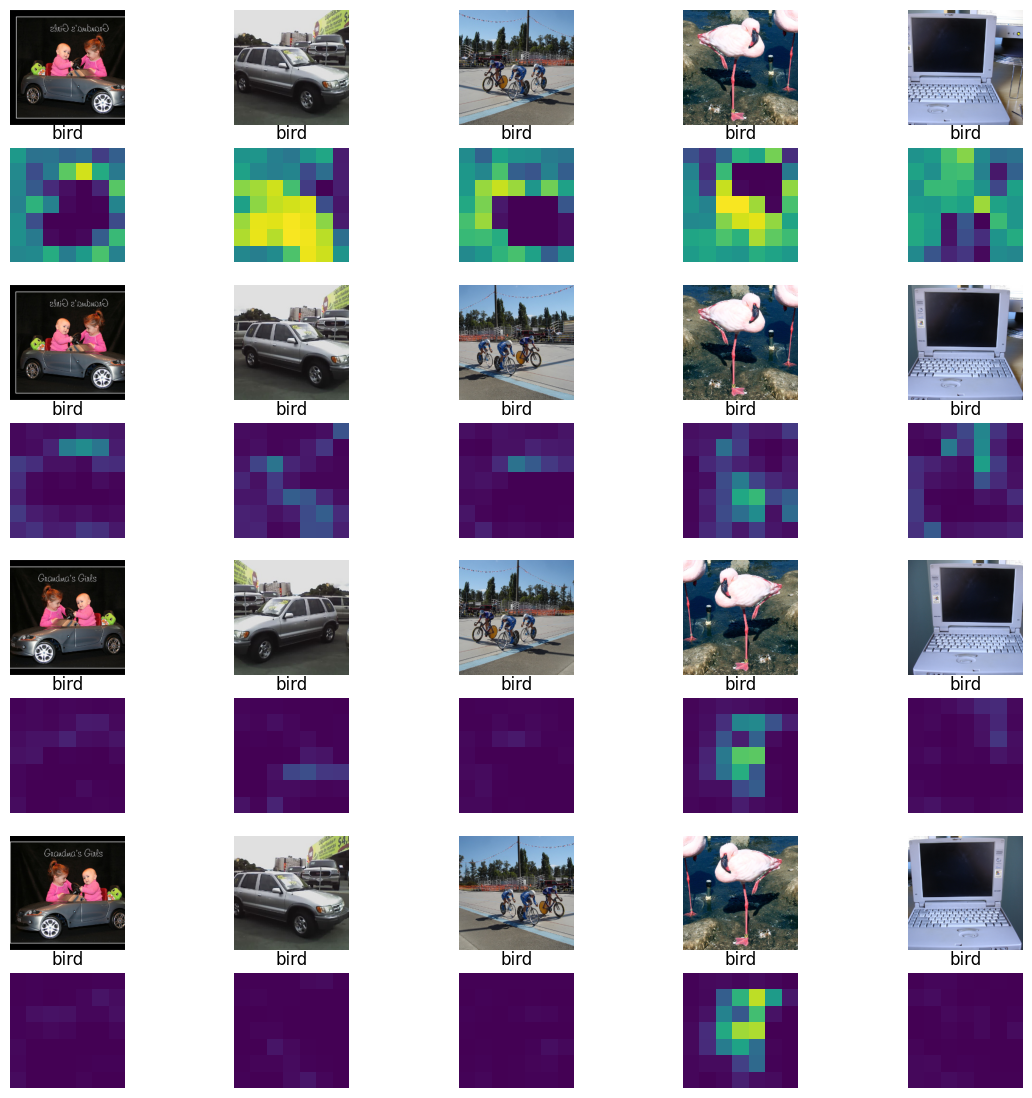

softmax_part_scheduled


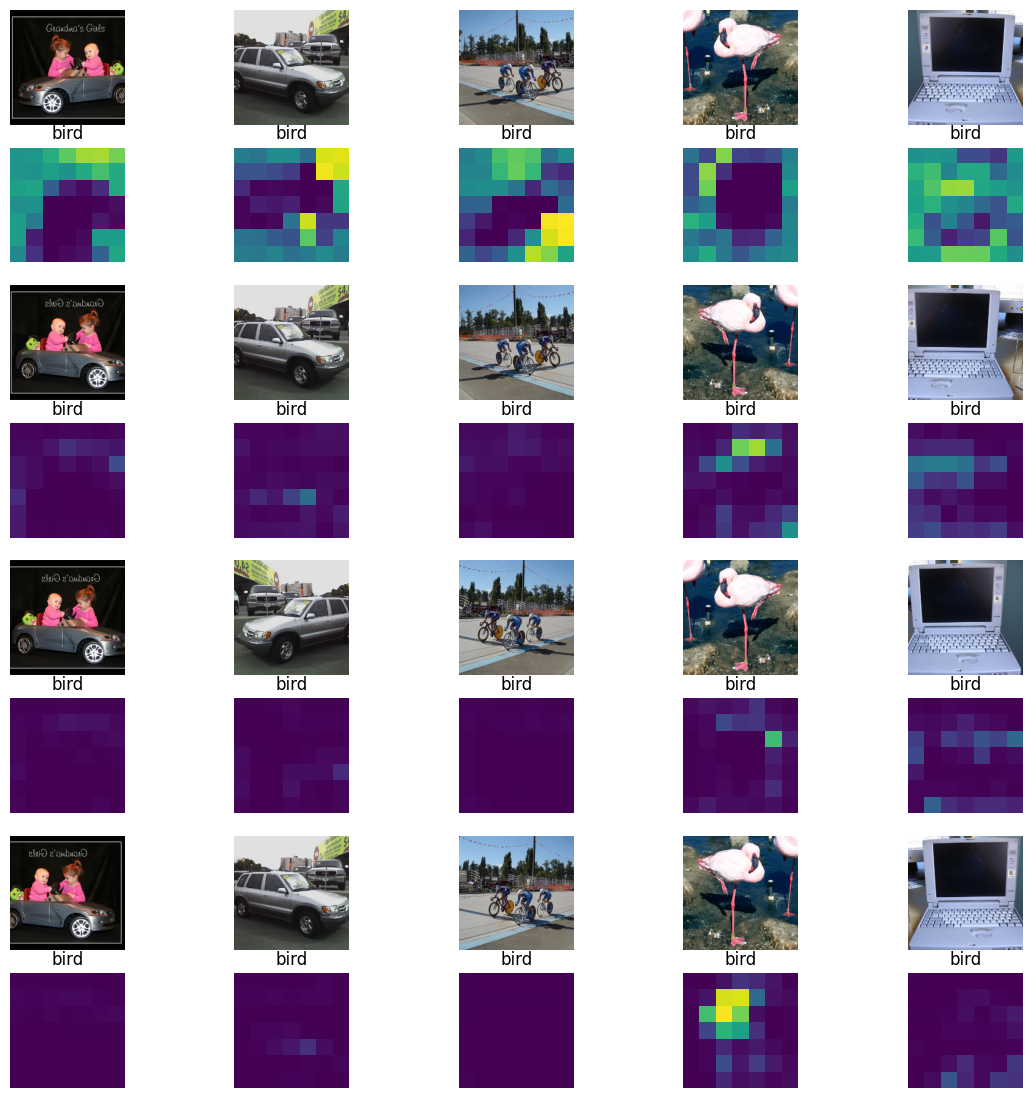

In [37]:
show_examples(names, name_compliment, img_numbers, epochs)

In [38]:
# names=["mean", "mean_scheduled", "softmax_cce", "softmax_scheduled", "softmax_scheduled_low_softmax_weight"]
# name_compliment = "_full"
# 743 747
img_num = [746]
epoch = 30

In [39]:
def show_examples_specific(names, compliments, img_numbers, epoch):
    for name in names:
        print(name)
        if not os.path.exists(f"../imgs/{name}"):
            os.makedirs(f"../imgs/{name}")
        full_name = "model_" + name
        directory = "examples/" + full_name
        # row_no += 1
        for col_no, im_no in enumerate(img_numbers):
            # col_no += 1
            # col_no *= 2
            img = np.load(f"{directory}/{epoch}_augmented_{im_no}.npy")
            img -= np.min(img)
            img /= np.max(img)
            # print(np.min(img), np.max(img))
            spatial_scores = np.load(f"{directory}/{epoch}_spatial_scores_{im_no}.npy")[0,:,:,1:]
            # print(np.mean(spatial_scores, axis=(0,1)))
            largest_contributor = np.argmax(np.mean(spatial_scores, axis=(0,1)))
            largest_contributor = largest_contributor if fixed_contributer is None else fixed_contributer
            scores = spatial_scores[:,:,largest_contributor]

            plt.imshow(img)
            plt.axis("off")
            plt.savefig(f"../imgs/{name}/image_{im_no}.jpg", bbox_inches="tight")
            plt.show()

            # print(np.min(scores), np.max(scores))
            plt.imshow(scores, cmap="viridis", vmin=0.0, vmax=1.0)
            plt.title(classes[largest_contributor + 1])
            plt.axis("off")
            plt.savefig(f"../imgs/{name}/scores_{im_no}.jpg", bbox_inches="tight")
            plt.show()

            sp_scores_cls = cv2.resize(scores, model_input_shape[:2], interpolation=cv2.INTER_LINEAR)
            colormap = cv2.applyColorMap((sp_scores_cls * 255).astype(np.uint8), cv2.COLORMAP_JET)
            colormap = cv2.cvtColor(colormap, cv2.COLOR_BGR2RGB)  # Convert for Matplotlib
            img_unnormalized = (cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX) * 255).astype(np.uint8)
            # Blend heatmap with the image
            alpha = 0.6  # Transparency factor
            print(img_unnormalized.shape, colormap.shape)
            overlay = cv2.addWeighted(img_unnormalized, 1 - alpha, colormap, alpha, 0)
            plt.imshow(overlay, cmap="viridis", vmin=0.0, vmax=1.0)

            plt.axis("off")
            plt.savefig(f"../imgs/{name}/heatmap_{im_no}.jpg", bbox_inches="tight")
            plt.show()



softmax_part_cce


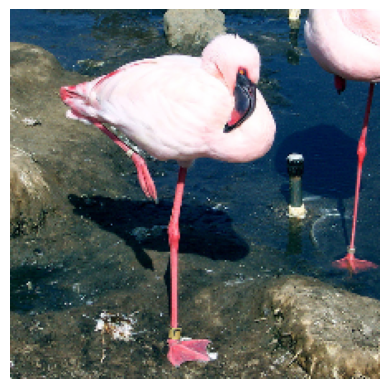

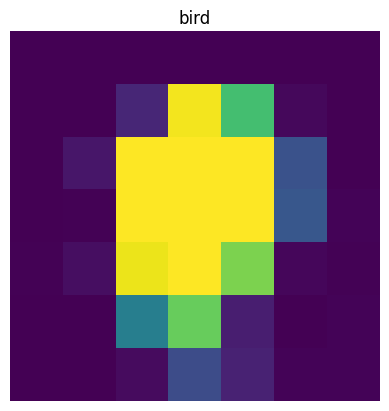

(224, 224, 3) (224, 224, 3)


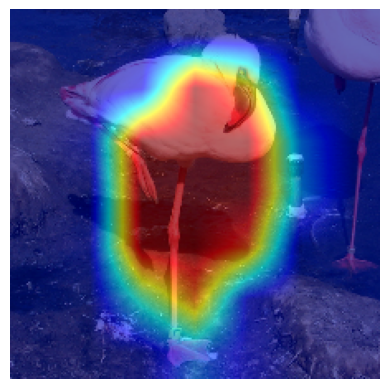

cce_part


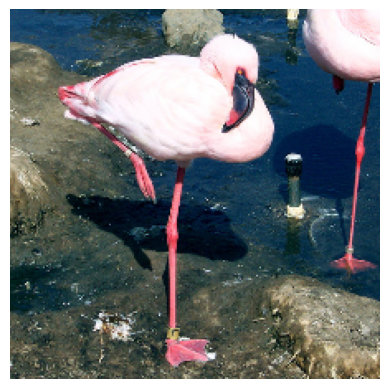

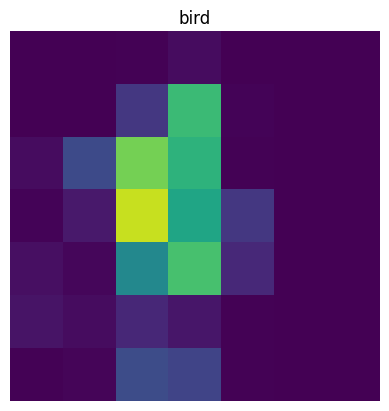

(224, 224, 3) (224, 224, 3)


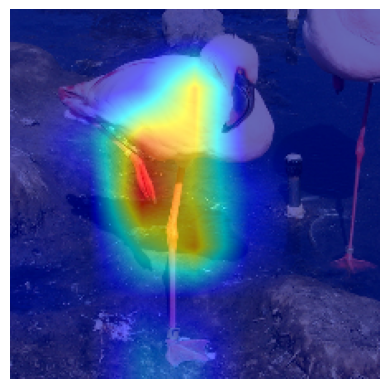

max_part_sal


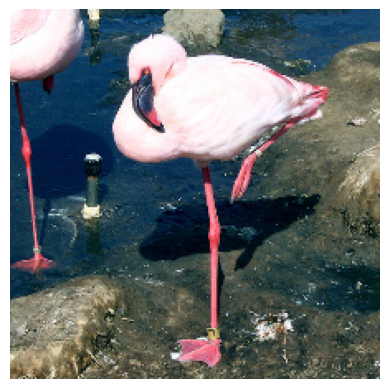

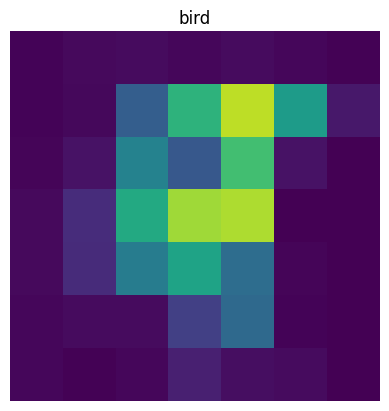

(224, 224, 3) (224, 224, 3)


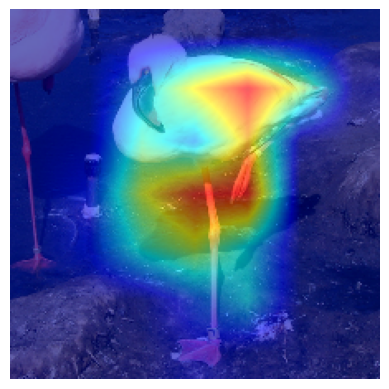

softmax_part_scheduled


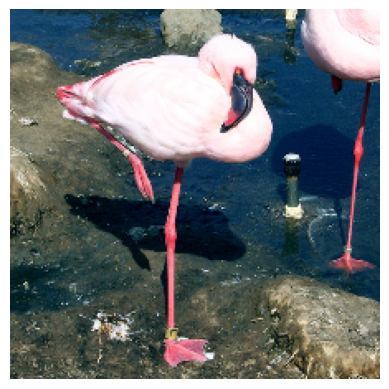

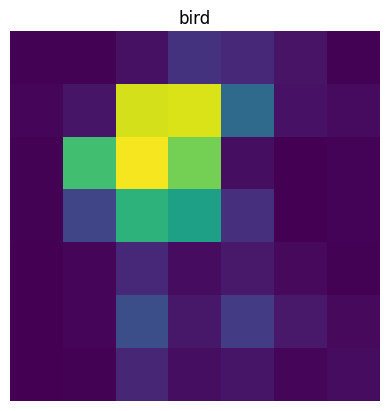

(224, 224, 3) (224, 224, 3)


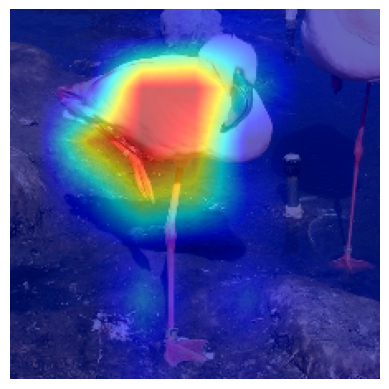

In [40]:
show_examples_specific(names, name_compliment, img_num, epoch)